In [147]:
import pandas as pd
pd.options.mode.copy_on_write = True
import numpy as np
import matplotlib.pyplot as plt

rate = 145540/2
Ngen = 10000000

n_bunches = 72 * ((3 + 3 + 4)*3 + (3 + 3 + 3))
cycle_time = 88924 #ns
duty_factor = 25*n_bunches / cycle_time



In [103]:
data = pd.read_csv("MuonsOut.txt",delim_whitespace=" ")
data.keys()

Index(['hit1', 'hit2', 'hitboth', 't1', 't2', 'int1_x', 'int1_y', 'int1_z',
       'int2_x', 'int2_y', 'int2_z', 'theta', 'phi', 'x0', 'y0', 'z0', 'dx',
       'dy', 'dz'],
      dtype='object')

In [104]:
data_hit1 = data.query("hit1==1")
data_hit2 = data.query("hit2==1")
data_hitboth = data.query("hitboth==1")

In [105]:
data_hitboth["first_plane"] = np.array(data_hitboth.t1 > data_hitboth.t2,dtype=int) + 1
for coord in ["x","y","z"]:
    data_hitboth["first_plane_%s"%coord] = np.where(data_hitboth.first_plane==1,data_hitboth["int1_%s"%coord],data_hitboth["int2_%s"%coord])
    data_hitboth["second_plane_%s"%coord] = np.where(data_hitboth.first_plane==1,data_hitboth["int2_%s"%coord],data_hitboth["int1_%s"%coord])

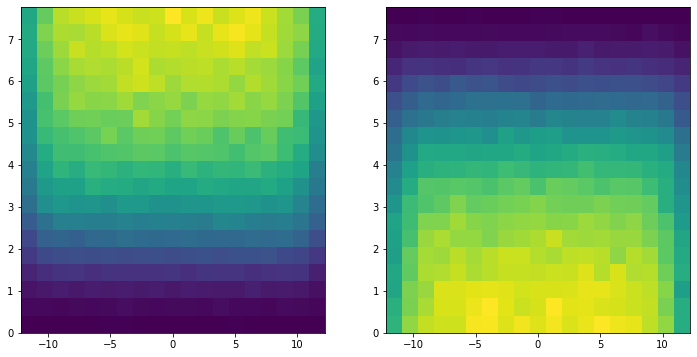

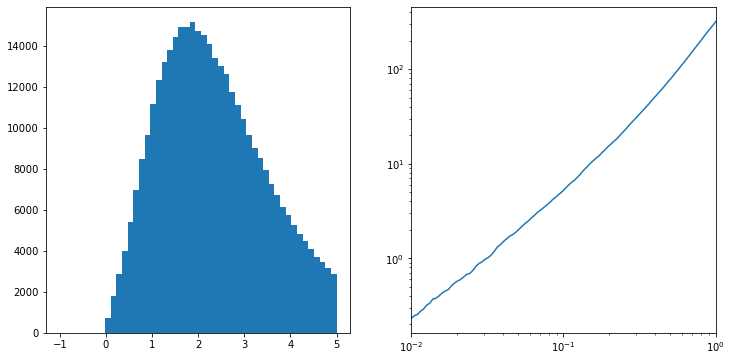

In [106]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ybins = np.linspace(-12.2,12.2,20)
zbins = np.linspace(0,7.77,20)

ax[0].hist2d(data_hitboth["first_plane_y"],data_hitboth["first_plane_z"],bins=(ybins,zbins))
ax[1].hist2d(data_hitboth["second_plane_y"],data_hitboth["second_plane_z"],bins=(ybins,zbins))
plt.show()

fig,ax = plt.subplots(1,2,figsize=(12,6))

data_hitboth["muon_height_difference"] = data_hitboth.first_plane_z - data_hitboth.second_plane_z
ax[0].hist(data_hitboth.muon_height_difference,bins=np.linspace(-1,5,50))
vertical_resolution_array = np.logspace(-2,0,100)
bkg_rate = np.empty_like(vertical_resolution_array)
for i,vertical_resolution in enumerate(vertical_resolution_array):
    num_bkg = sum(data_hitboth.muon_height_difference <= vertical_resolution)
    bkg_rate[i] = rate*num_bkg/Ngen
ax[1].plot(vertical_resolution_array,bkg_rate)
ax[1].set_xlim(vertical_resolution_array[0],vertical_resolution_array[-1])
ax[1].loglog()
plt.show()

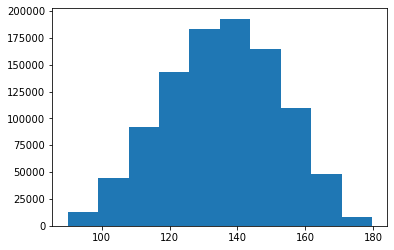

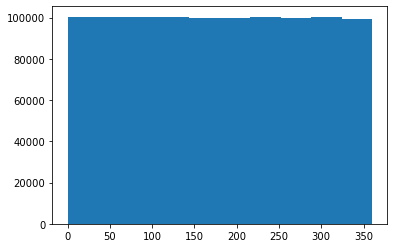

In [80]:
plt.hist(180./np.pi*data.theta)
plt.show()
plt.hist(180./np.pi*data.phi)
plt.show()

In [121]:
n_bunches = 72 * ((3 + 3 + 4)*3 + (3 + 3 + 3))

In [142]:
n_missing_bunches = 3*(8*(2+2+3) + 2*38 + 39) + (8 * (2+2+2) + 38 * 2 + 119)

In [143]:
25*(n_bunches + n_missing_bunches)

89100

In [150]:
n_bunches * (1/(cycle_time*1e-9))

31577526.87688363